In [ ]:
# !pip install scikit-learn

In [5]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [20]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 257 kB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 32.7 MB/s eta 0:00:01


In [106]:
#Data Preprocessing
import pandas as pd 
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

#Data Preprosessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import collections as Counter #Counting

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report 
from sklearn.metrics import confusion_matrix

In [108]:
data = pd.read_csv('Customer-Churn - Customer-Churn.csv')

In [110]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [114]:
#Data verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [116]:
#Dimentionality of the data. i.e. the number of rows and columns 
data.shape

(7043, 21)

**Narration**

The dataset used for this analysis consists of 7043 records and 21 features including the target variable. The features are related to customer churn and include the following:

**customerID:** Unique identifier for the customer

**gender:** Customer's gender (Female, Male)

**SeniorCitizen:** Whether the customer is a senior citizen (1, 0)

**Partner:** Whether the customer has a partner (Yes, No)

**Dependents:** Whether the customer has dependents (Yes, No)

**tenure:** Number of months the customer has stayed with the company

**PhoneService:** Whether the customer has a phone service (Yes, No)

**MultipleLines:** Whether the customer has multiple lines (Yes, No, No phone service)

**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity:** Whether the customer has online security (Yes, No, No internet service)

**OnlineBackup:** Whether the customer has online backup (Yes, No, No internet service)

**DeviceProtection:** Whether the customer has device protection (Yes, No, No internet service)

**TechSupport:** Whether the customer has tech support (Yes, No, No internet service)

**StreamingTV:** Whether the customer has streaming TV (Yes, No, No internet service)

**StreamingMovies:** Whether the customer has streaming movies (Yes, No, No internet service)

**Contract:** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling:** Whether the customer has paperless billing (Yes, No)

**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer


In [ ]:
#Statistical analysis of the dataset
data.describe().T

In [118]:
# Checking for missing values in the dataset
missing_vals = data.isnull().sum()
missing_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

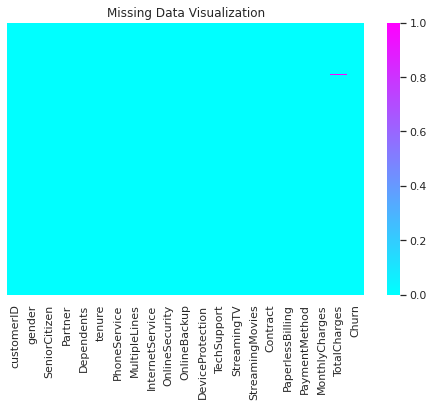

In [120]:
#Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(data.isnull(), cbar=True, cmap = "cool", yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

In [122]:
#Check for duplicate (s)
data.duplicated().sum()

0

****Exploratory Data Analysis****

In [129]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Distribution of the Target Variable:

The count plot shows the distribution of the binary target variable 'Churn,' indicating the proportion of instances where maintenance is needed or not.

In [10]:
# Overall Churn Rate
churn_rate = data['Churn'].value_counts(normalize=True) * 100
churn_rate

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
# Set the plotting style
sns.set(style="whitegrid")

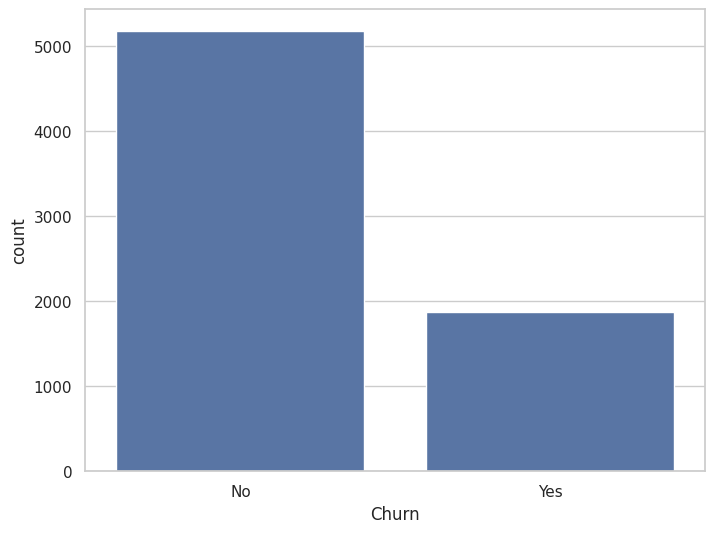

In [ ]:
# Distribution of the target variable 'Churn'
plt.figure(figsize=(8,6))

sns.countplot(x='Churn', data=data)
plt.show()

**Narration:**

Approximately 26.54% of customers have churned, indicating that more than a quarter of the customers in this dataset have left the company. In addition, the result shows that the data is imbalanced. 

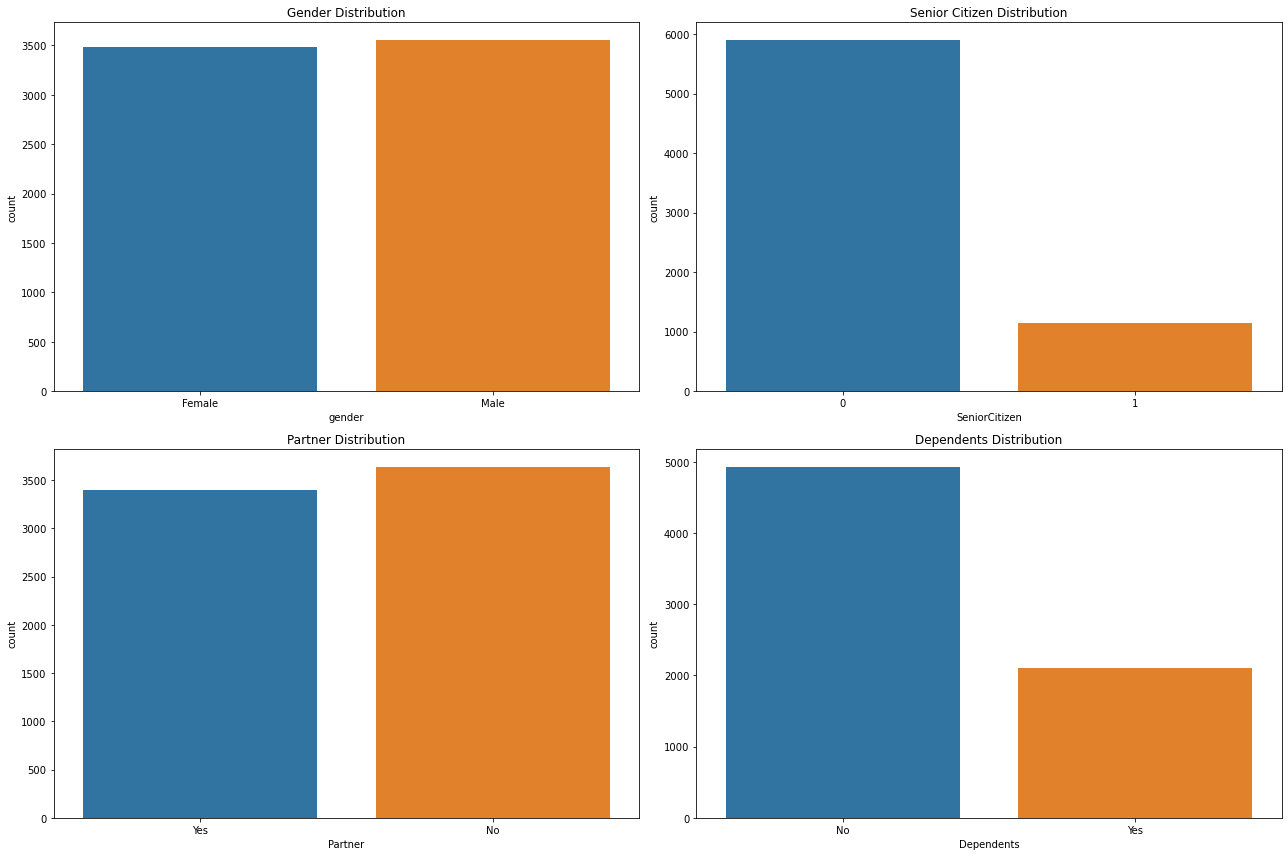

In [54]:
# Distribution of Key Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gender Distribution
sns.countplot(data=data, x='gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# SeniorCitizen Distribution
sns.countplot(data=data, x='SeniorCitizen', ax=axes[0, 1])
axes[0, 1].set_title('Senior Citizen Distribution')

# Partner Distribution
sns.countplot(data=data, x='Partner', ax=axes[1, 0])
axes[1, 0].set_title('Partner Distribution')

# Dependents Distribution
sns.countplot(data=data, x='Dependents', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution')

plt.tight_layout()
plt.show()


**Univariate Analysis**

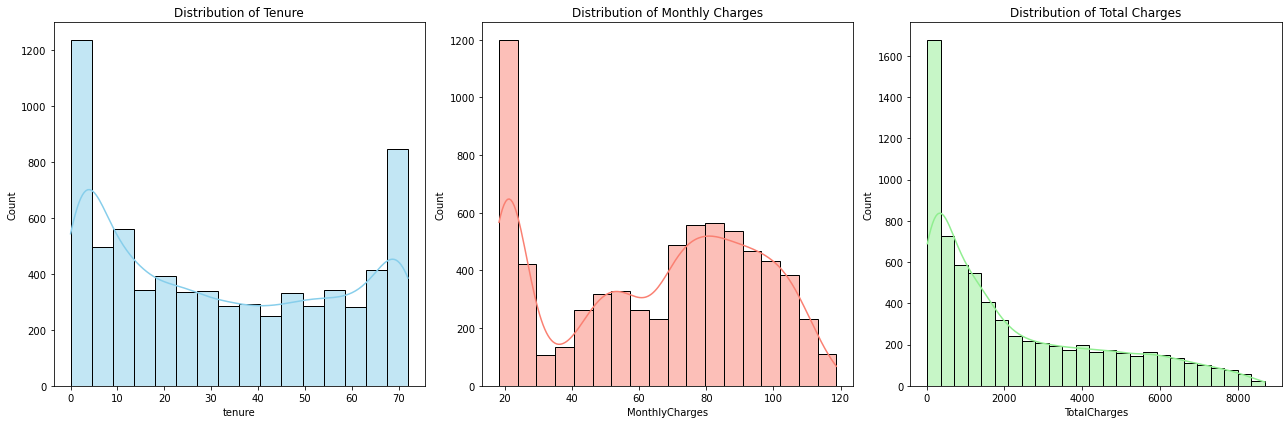

In [60]:
# Univariate Analysis on Numerical Variables

# Set up the matplotlib figure for plotting multiple univariate distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting distributions of numerical variables

#How long does a customer typically remain with the company?
sns.histplot(data['tenure'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Tenure')

#What are the ranges of charges customers are paying?
sns.histplot(data['MonthlyCharges'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Monthly Charges')

#What is the cumulative amount a customer has paid over time?
sns.histplot(data['TotalCharges'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


**Narration:**

**Distribution of Tenure (Leftmost Histogram):**

The x-axis represents the tenure, which is typically measured in months, and the y-axis represents the count of customers.
The histogram shows that a large number of customers have a very short tenure, as indicated by the high bar at the left end of the graph.
There appears to be a cyclical pattern with peaks and troughs, suggesting that there are specific tenure lengths where customer count peaks — potentially indicating common contract lengths or times when customers are more likely to leave or stay.
The overlaying line might represent a kernel density estimation (KDE) which gives a smoothed version of the histogram, showing the probability density of tenure.
Distribution of Monthly Charges (Center Histogram):

The x-axis represents the amount of monthly charges, and the y-axis represents the count of customers.
This histogram looks bimodal, suggesting two different groups or types of customers with different spending behaviors. One group seems to be clustered around the lower monthly charges, while another group is clustered around higher monthly charges.
The spread of the monthly charges is wide, indicating that customers pay a variety of different amounts each month.
Distribution of Total Charges (Rightmost Histogram):

The x-axis represents the total amount charged to customers over the entirety of their tenure, and the y-axis represents the count of customers.
The histogram shows a right-skewed distribution, with many customers having low total charges and a tail extending to higher total charges. This is common for total charges as newer customers have not had time to accumulate high charges.
The decrease in customer count as total charges increase suggests that fewer customers stay long enough to accrue high total charges.
From a business perspective, these distributions can provide insights into customer behavior:

The tenure distribution with a high number of customers at lower tenure could indicate a high churn rate or a large influx of new customers.
The bimodal distribution of monthly charges might reflect different customer segments, possibly indicating that there are basic and premium service subscribers.
The right-skewed total charges distribution suggests that while many customers may start a service, a smaller number remain as long-term customers.
For predictive modeling and strategy development, these insights could help tailor customer retention efforts, such as focusing on customers who are reaching the common churn points in tenure, creating targeted marketing campaigns for different spending groups, and developing loyalty programs aimed at increasing the tenure of customers, thus increasing their lifetime value.

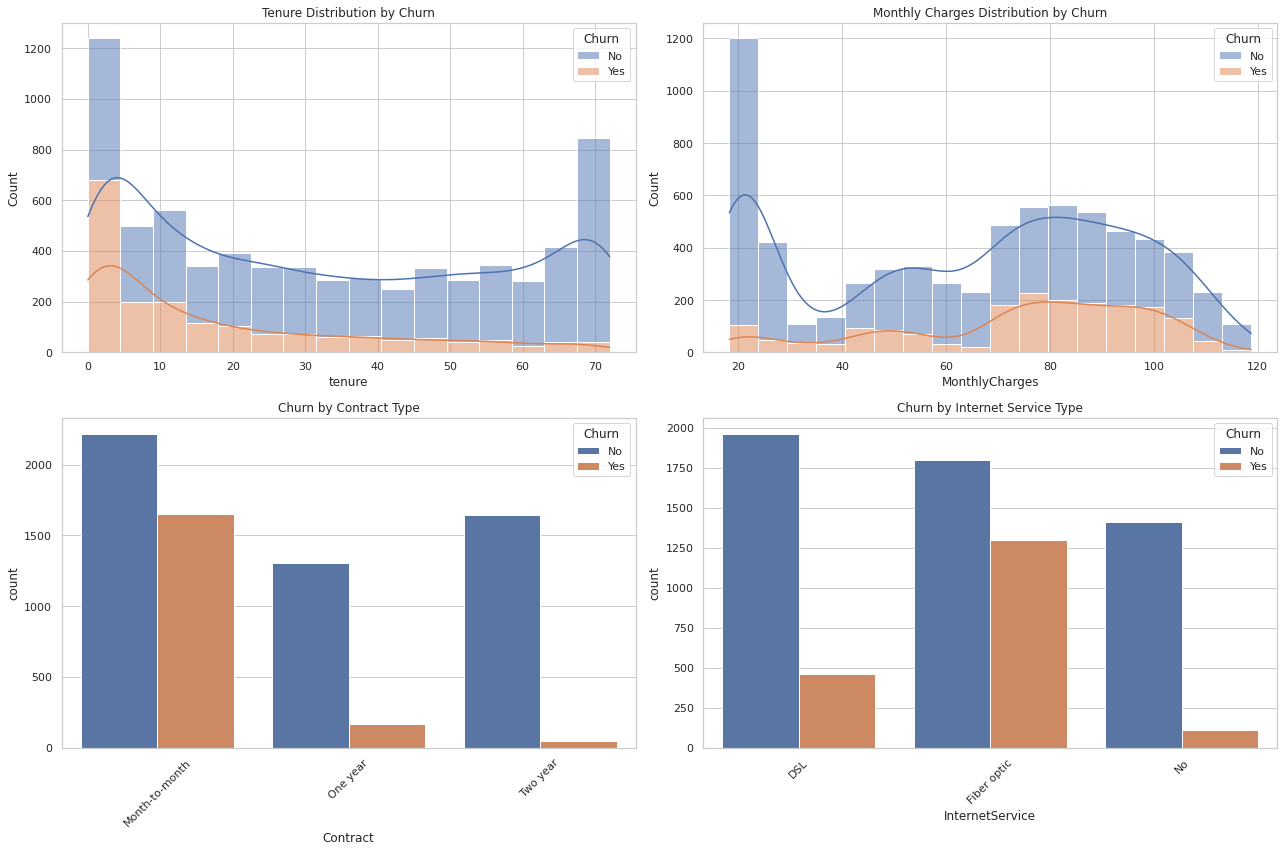

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Tenure vs. Churn
sns.histplot(data=data, x="tenure", hue="Churn", multiple="stack", kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Tenure Distribution by Churn')

# Plot for MonthlyCharges vs. Churn
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", multiple="stack", kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges Distribution by Churn')

# Plot for Contract vs. Churn
sns.countplot(data=data, x="Contract", hue="Churn", ax=axes[1, 0])
axes[1, 0].set_title('Churn by Contract Type')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for InternetService vs. Churn
sns.countplot(data=data, x="InternetService", hue="Churn", ax=axes[1, 1])
axes[1, 1].set_title('Churn by Internet Service Type')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Narration:**

The visualizations above provide insights into the relationships between customer churn and key features:

Tenure Distribution by Churn:

Customers with shorter tenure are more likely to churn, indicated by a higher proportion of churned customers in the early tenure range.
As tenure increases, the likelihood of churn decreases, showing that long-term customers are more likely to stay.
Monthly Charges Distribution by Churn:

Customers with higher monthly charges are more likely to churn, as seen by the stacked distribution leaning towards churned customers at higher charge levels.
Lower monthly charges show a mix of churned and retained customers, with a slightly higher tendency for customers to stay.
Churn by Contract Type:

Month-to-month contracts have a significantly higher churn rate compared to one-year and two-year contracts. This suggests that customers with shorter commitment periods are more likely to leave.
One-year and two-year contracts exhibit lower churn rates, indicating that longer commitments correlate with higher customer retention.

Churn by Internet Service Type:

Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service. This could be due to expectations around service quality or price satisfaction.
DSL service sees a lower churn rate, and customers without internet service (phone service only) have the lowest churn rate among the categories.

These findings could be valuable for developing targeted customer retention strategies, such as offering incentives for longer contract commitments or addressing service quality and pricing concerns, especially for customers with fiber optic internet service or those on month-to-month contracts. ​

#### Pairplot of Selected Features:

The pairplot displays scatterplots of selected features against each other, with different colors for instances where the Engine Failed or did not. This helps observe potential separability of classes based on feature values.

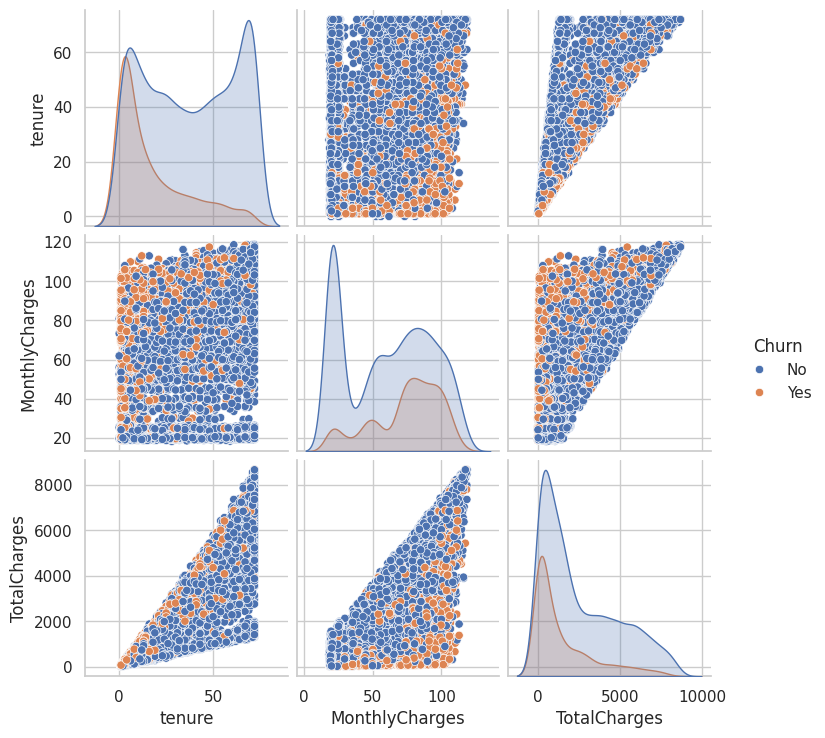

In [ ]:
# Pairplot for selected features (Numerical Features)
selected_features = ['tenure',	'MonthlyCharges', 'TotalCharges']

sns.pairplot(data, hue='Churn', vars=selected_features)
plt.show()

**Narration:**

Churned customers spread across the spectrum of monthly charges: In the scatter plot that compares 'MonthlyCharges' with 'Churn', we see that the customers who have churned (marked in orange) are scattered across the entire range of monthly charges. This indicates that churn is occurring at various price points, not just high or low extremes.

Density of churned customers at higher monthly charges: In the same scatter plot, there is a noticeable accumulation of orange points (churned customers) at the higher end of the monthly charges axis. This visual cluster suggests that a higher proportion of customers who face higher monthly charges tend to churn compared to those with lower monthly charges.

Non-churned customers concentrated in lower and middle ranges: Looking again at the scatter plot for 'MonthlyCharges', the blue points, which represent customers who have not churned, seem to be more densely packed at the lower to middle range of the monthly charges. This suggests that customers who experience lower monthly charges are less likely to churn, a pattern that is also supported by the histograms along the diagonal of the matrix, where the blue peak (non-churned customers) is higher at the lower end of the charges.

**Bivariate Analysis**

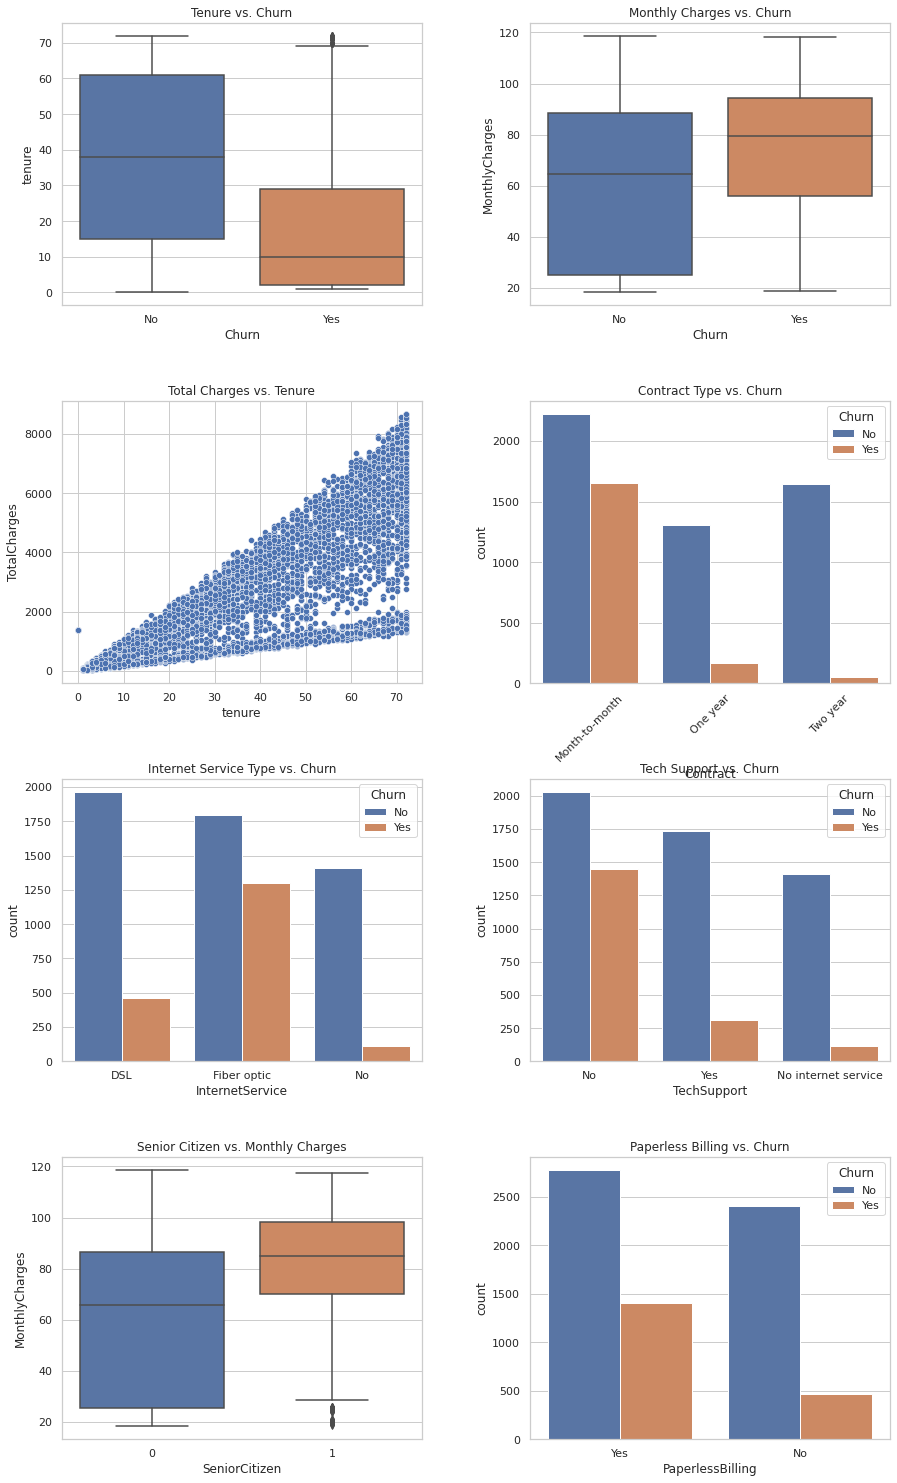

In [72]:
#Bivariate Analysis

# Setting up the figure for multiple plots
fig, axes = plt.subplots(4, 2, figsize=(14, 22))

# Adjusting layout
plt.tight_layout(pad=6.0)

# 1. Tenure and Churn
sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Tenure vs. Churn')

# 2. Monthly Charges and Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges vs. Churn')

# 3. Total Charges and Tenure
sns.scatterplot(x='tenure', y='TotalCharges', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Total Charges vs. Tenure')

# 4. Contract Type and Churn
sns.countplot(x='Contract', hue='Churn', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Contract Type vs. Churn')
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Internet Service Type and Churn
sns.countplot(x='InternetService', hue='Churn', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Internet Service Type vs. Churn')

# 6. Tech Support and Churn
sns.countplot(x='TechSupport', hue='Churn', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Tech Support vs. Churn')

# 7. Senior Citizen and Monthly Charges
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Senior Citizen vs. Monthly Charges')

# 8. Paperless Billing and Churn
sns.countplot(x='PaperlessBilling', hue='Churn', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Paperless Billing vs. Churn')

plt.show()


**Narration**

Based on the pairplot output, here are the insights that were drawn:

Tenure vs. Churn:

There's a noticeable concentration of churned customers (orange points) with lower tenure. This suggests that newer customers are more likely to churn than those who have been with the company longer.
The distribution of tenure for non-churned customers (blue points) is more uniform, but with a slight increase towards higher tenure, indicating that customers who stay longer are less likely to churn.


Monthly Charges vs. Churn:

Churned customers seem to be more spread out across the spectrum of monthly charges, but there's a visible density of churned customers at higher monthly charges.
Non-churned customers are also spread across the range of monthly charges but seem to have a concentration in the lower and middle ranges.

Total Charges vs. Churn:

The scatter plots show that churned customers generally have lower total charges, which aligns with the observation that they tend to have lower tenure.
Non-churned customers appear to have a wider spread of total charges, accumulating higher values as expected with longer tenure.

Relationships Between Features:

Tenure and Total Charges: There is a clear positive correlation between tenure and total charges for both churned and non-churned customers, which makes sense as the longer a customer stays, the more total charges they would have accumulated.

Tenure and Monthly Charges: The relationship is less clear, suggesting that monthly charges are not directly related to how long the customers have been with the company.

Monthly Charges and Total Charges: The relationship shows a trend where customers with higher monthly charges also tend to have higher total charges, though this is less apparent for churned customers.

Implications

Tenure: Given the concentration of churned customers at lower tenure, this feature could be a strong predictor in a churn prediction model.

Monthly Charges: Higher monthly charges could be a contributing factor to churn, and thus this feature should also be considered in predictive modelling.

Total Charges: While there is a positive relationship with tenure, the total charges alone may not be as strong a predictor due to the overlap in distributions between churned and non-churned customers.

Other insights:
Non-linear Relationships: The pairplot indicates that the relationships between features and churn are not purely linear, which suggests that linear models may not fully capture the complexity of the dataset. Non-linear models or feature engineering might be necessary.

<ipython-input-11-b88a4d341948>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


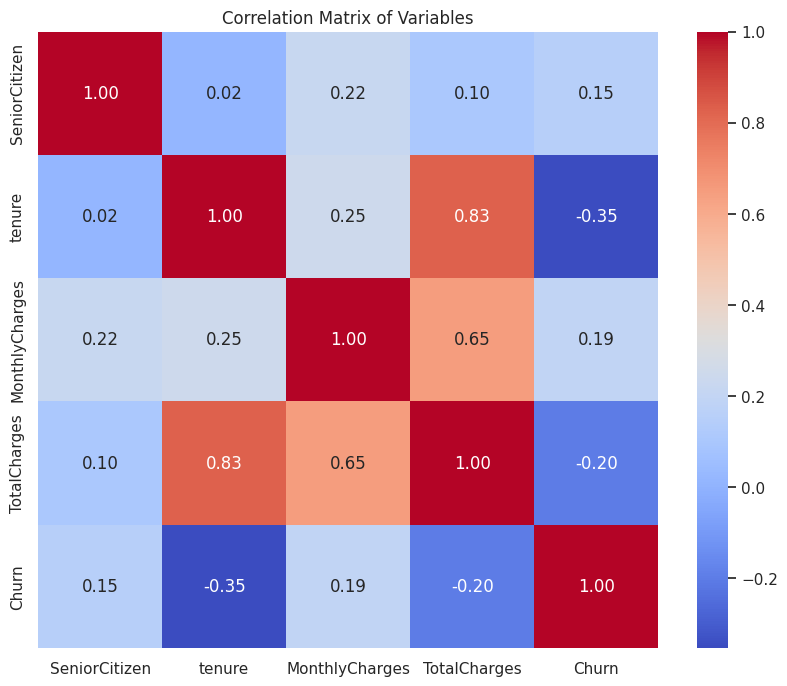

In [ ]:
# Correlation Matrix of the Variables
# First, we need to ensure all numerical for correlation, including transforming 'Churn' into a binary variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

**Handling Missing Data:**

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Multivariate Analysis**

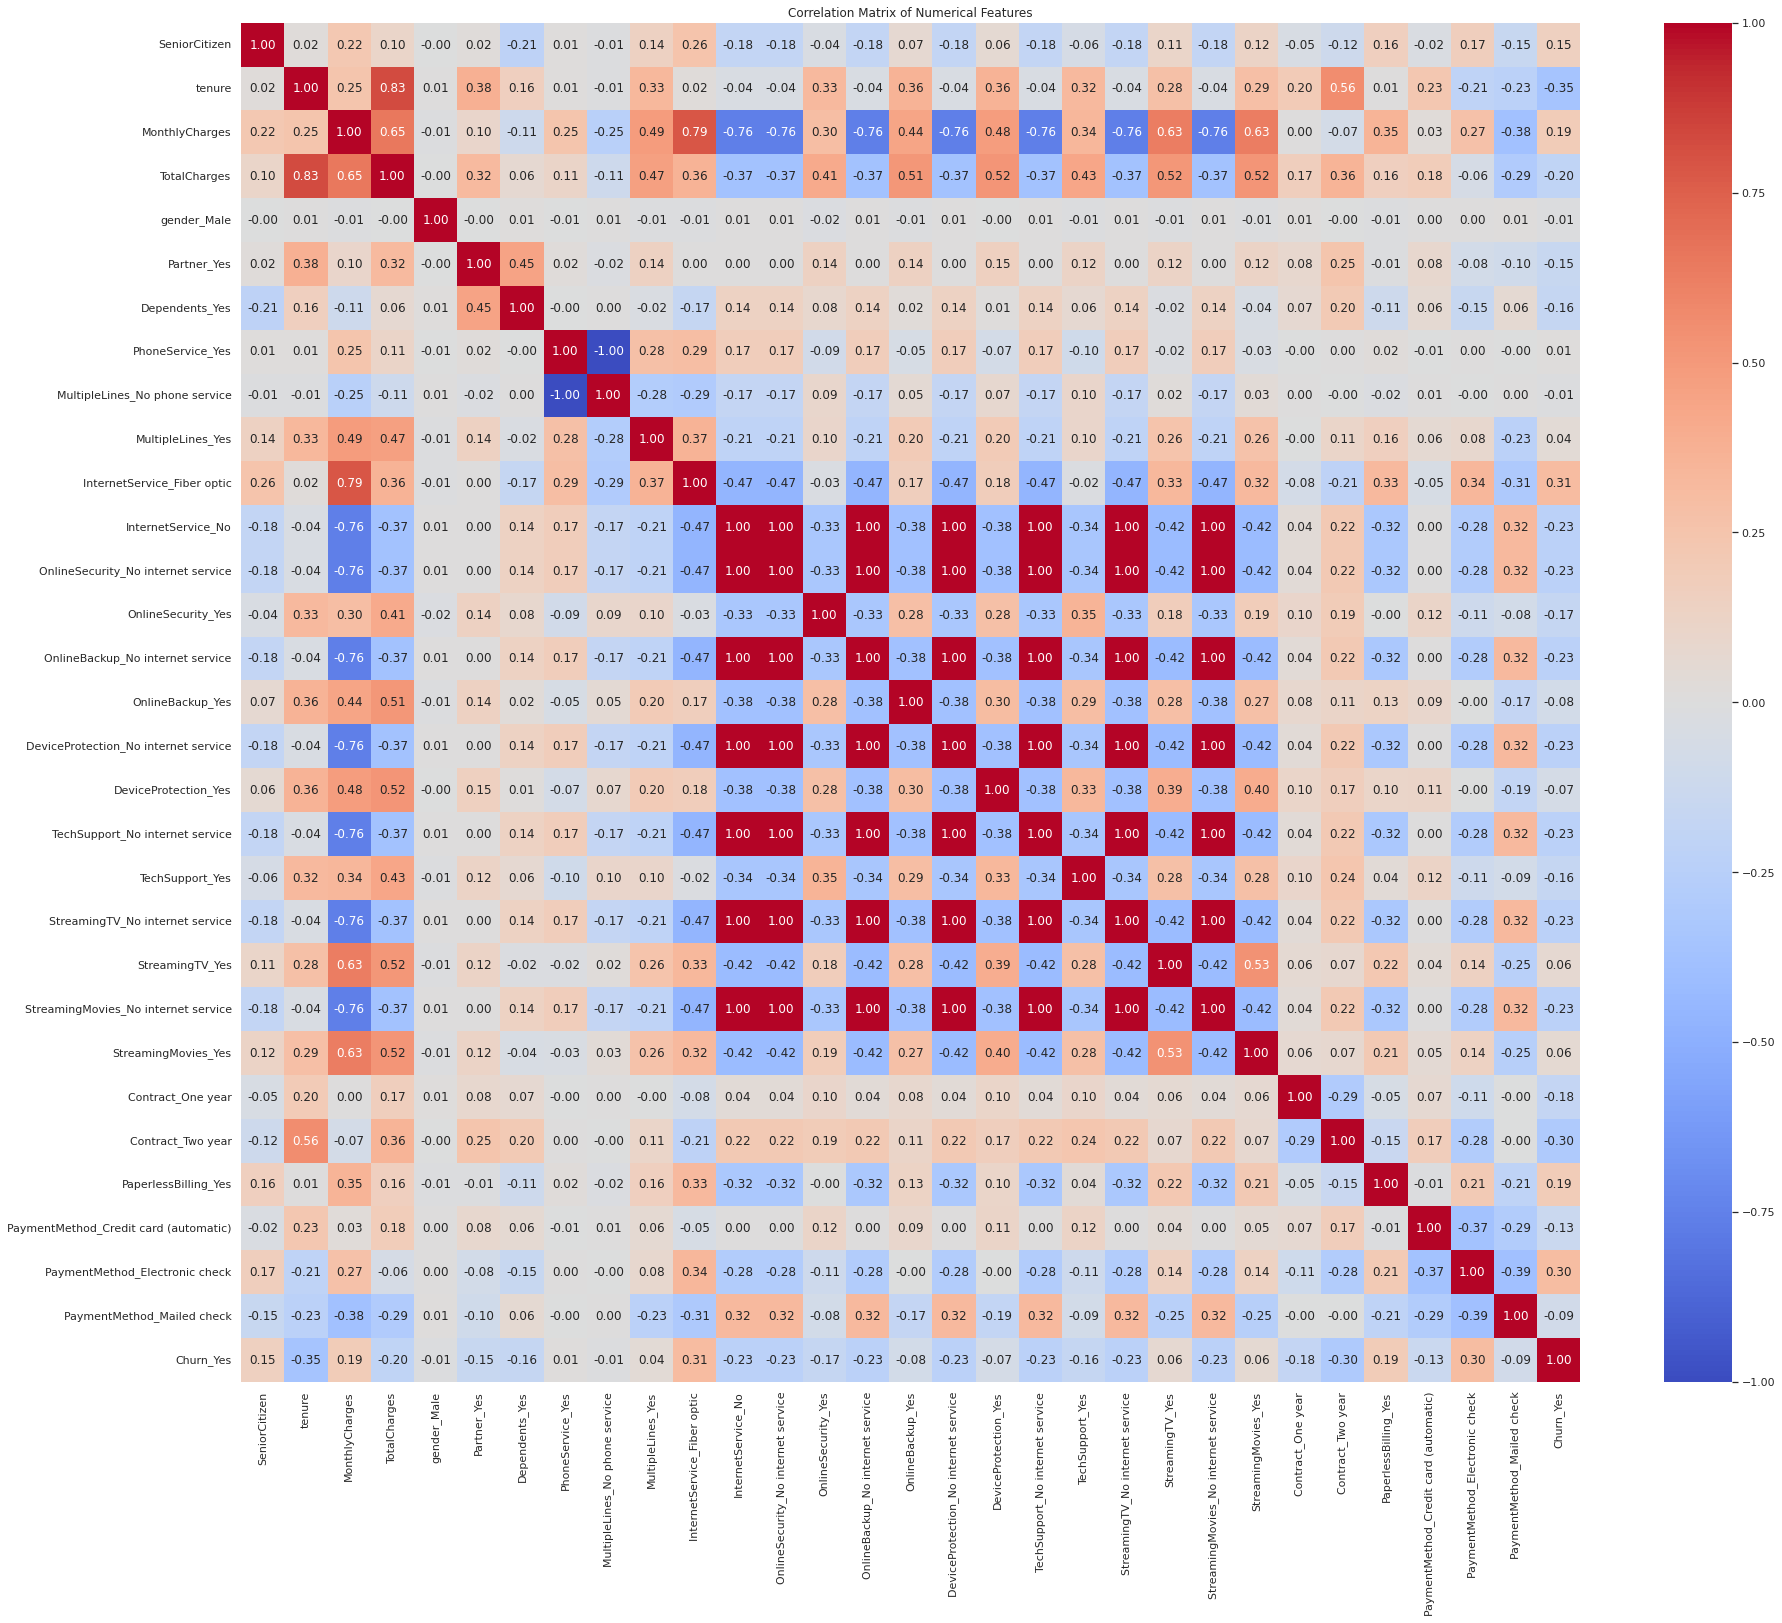

In [189]:
# Visualize the correlation matrix using a heatmap

# Calculate the correlation matrix for the numerical features
correlation_matrix = data_encoded.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Narration:**

The correlation analysis, visualized through the heatmap and specifically detailed for the 'Churn' variable, reveals several insights:
**
Strong Positive Correlations with Chur**
n-:
InternetService_Fiber optic: Customers with fiber optic internet service are more likely to churn, possibly due to pricing or service quality issu
e-s.
PaymentMethod_Electronic check: Customers using electronic checks for payment have a higher tendency to ch
u-rn.
MonthlyCharges: Higher monthly charges are associated with increased churn, suggesting price sensitivity among custo

m**ers.
Strong Negative Correlations with **
Churn:
Contract_Two year: Customers on two-year contracts are less likely to churn, indicating that longer commitments are associated with reduced chur
n risk.
tenure: Longer tenure is strongly negatively correlated with churn, showing that customers who have been with the company longer are less likely t
o leave.
InternetService_No and related features (indicating no internet service): These features are negatively correlated with churn, suggesting customers with only phone service (and no internet) are less likely t
**o churn.
Obs**
ervations:
Features related to no internet service have negative correlations because they're tied together and inverse to having internet service, partirelarly fiber optic, which is positively correlated 
with churn.
The positive correlation with electronic payment methods might reflect a demographic that is more comfortable changing providers or more sensitive to ser
vice issues.
The negative correlations with longer contracts and tenure highlight the importance of customer loyalty and the stabilizing effect of longer-term ​

In [ ]:
missing_column = missing_values[missing_values >0].index
missing_column

Index(['TotalCharges'], dtype='object')

In [ ]:
# Imputing missing values (mean imputation for simplicity)
data.fillna(data[missing_column].mean(), inplace=True)

In [ ]:
# Verify that missing values have been handled
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Handling Outliers:

In [ ]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


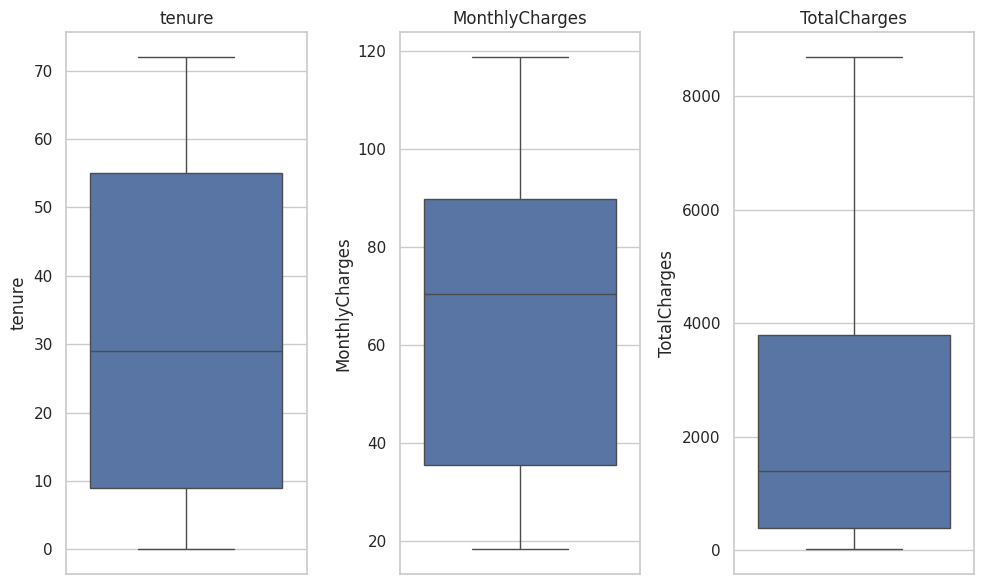

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a list of numerical columns to check for outliers
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot box plots for each numerical column
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


**Narration:**

Tenure: There don't appear to be any extreme outliers. The distribution seems fairly uniform across the range, which is expected given the nature of tenure (0 to 72 months).

MonthlyCharges: Similar to tenure, there don't seem to be extreme outliers. The distribution is wide, reflecting a broad range of monthly charges, which is normal given the variety of services and plans offered.

TotalCharges: This distribution also does not show extreme outliers. The data points spread towards the higher values can be considered natural due to the accumulation of charges over time, especially for long-term customers.

Based on the visual inspection, there do not seem to be any significant outliers that would typically warrant concern or require further investigation in these three columns. This analysis helps ensure that the data's variability is genuine and not significantly skewed by outliers.

### Data Exploration Insights ###

1. **Target Variable Distribution:**
   - Given the nature of churn analysis, where the number of non-churning customers might significantly outnumber the churning customers, addressing this imbalance is crucial for building an effective predictive model.

3. **Pairplot of Selected Features:**
   - Pairplots of selected features indicate limited separability between instances of failed engines and those that did not.
   - Temperature and pressure show some trends, but other features exhibit considerable overlap.

4. **Correlation Analysis:**
   - 'Temperature' and 'Pressure' have a moderate positive correlation (0.71), suggesting a relationship between these parameters.
   - Other features show weak correlations (less than 0.05) with 'Engine_Failure,' indicating potential nonlinear relationships.

5. **Considerations for Modeling:**
   - Weak linear correlations do not rule out meaningful relationships, especially if they are nonlinear or interact with other features.
   - Explore feature importance using algorithms like logistic regression, decision trees or ensemble methods to identify key predictors.


 **Feature Engineering**

  **One-Hot Encoding**

In [ ]:
# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

# Exclude customerID from encoding since it's a unique identifier
categorical_columns_for_encoding = categorical_columns.drop('customerID')

# Apply one-hot encoding to the categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns_for_encoding, drop_first=True)

# Display the shape of the new dataframe to see the increase in columns
data_encoded_shape = data_encoded.shape

data_encoded_shape


(7043, 32)

**Narration**

After applying one-hot encoding to the categorical variables (excluding the customerID, which is a unique identifier and not useful for modeling), the dataset now contains 32 columns. This increase from the original 21 columns reflects the additional columns created for each category level in the nominal variables, with one level dropped per variable to avoid multicollinearity issues (a standard practice in one-hot encoding).

This transformation has prepared the categorical data for modeling by converting it into a format that machine learning algorithms can work with effectively. If there are any specific categorical variables that you believe should be treated as ordinal or if you need further feature engineering, such as normalization or feature selection, please let me know! ​

In [ ]:
#Create new features

# Categorize tenure into bins
data_encoded['TenureBins'] = pd.cut(data_encoded['tenure'], bins=[0, 12, 24, 60, 72], labels=['0-12', '13-24', '25-60', '61-72'], include_lowest=True)

# Create a binary feature for customers with both phone and internet services
# Assuming 'No phone service' and 'No internet service' as indicators for not having one of the services
data_encoded['HasPhoneAndInternet'] = ((data_encoded['PhoneService_Yes'] == 1) & (data_encoded['InternetService_No'] == 0)).astype(int)

# Calculate the effective average monthly charge
data_encoded['EffectiveMonthlyCharge'] = data_encoded['TotalCharges'] / data_encoded['tenure']
# Replace infinite values with NaN (can happen if tenure is 0) and then fill with 0 or monthly charges
data_encoded['EffectiveMonthlyCharge'].replace([float('inf'), -float('inf')], np.nan, inplace=True)
data_encoded['EffectiveMonthlyCharge'].fillna(data_encoded['MonthlyCharges'], inplace=True)

# Display the first few rows to verify the new features
data_encoded[['TenureBins', 'HasPhoneAndInternet', 'EffectiveMonthlyCharge']].head()


,TenureBins,HasPhoneAndInternet,EffectiveMonthlyCharge
0,0-12,0,29.850000
1,25-60,1,55.573529
2,0-12,1,54.075000
3,25-60,0,40.905556
4,0-12,1,75.825000


In [48]:
data_encoded.head(0)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes


**Narration:**

The new features introduced to the dataset include:

**TenureBins:** This appears to be a categorical feature that represents the tenure of a customer grouped into bins. There are two bins shown: '0-12' months and '25-60' months. This categorization helps to simplify the analysis by grouping customers into cohorts based on how long they have been with the company.

**HasPhoneAndInternet:** This is a binary feature, engineered from data indicating whether a customer has both phone and internet services. '0' represents customers who do not have both services, while '1' indicates customers who do have both.

**EffectiveMonthlyCharge:** This seems to be a continuous feature that likely represents the monthly charge a customer effectively pays. The values vary from around 29.85 to 75.82, suggesting there is some variation in what customers are paying every month, possibly depending on the services they have.

**Insights:**
Service Bundling Impact: Customers with both phone and internet services (HasPhoneAndInternet = 1) seem to have higher effective monthly charges compared to those who do not have both services. This suggests that bundling services could be associated with higher revenue per customer.

**Tenure and Charges Relationship:** Customers in different tenure bins seem to have varying effective monthly charges. However, from this small output, it's not immediately clear whether there's a direct relationship between tenure length and effective monthly charges. For instance, customers with '0-12' months of tenure show both lower and higher effective monthly charges.

**Potential for Customer Segmentation:** The existence of tenure bins and bundled services implies potential for customer segmentation in further analysis to aid marketing efforts. 





**Modeling Approach:**
   - Classification algorithms used are random forests, logistic regression, and gradient-boosting decision trees
   - SMOTE (an oversampling technique for handling class imbalance) was used to increase the size of the minority class (churning customers) by randomly replicating instances.
   - Data was normalized/standardized using StandardScaler()


In [42]:

# Handle missing values in 'TotalCharges'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Apply one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns_for_encoding = categorical_columns.drop('customerID')
data_encoded = pd.get_dummies(data, columns=categorical_columns_for_encoding, drop_first=True)

# Define features and target
X = data_encoded.drop(['customerID', 'Churn_Yes'], axis=1)  # Exclude 'customerID' and target variable
y = data_encoded['Churn_Yes']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Handling the class imbalance
sm = SMOTE(random_state=42) 
X_res, y_res = sm.fit_resample(X_train, y_train)

# Now standardize/normalize the data
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)  # Fit and transform on the resampled training set
X_test_scaled = scaler.transform(X_test)    # Transform the test set using the same scaler


# X_res and y_res were then used for training the models
# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Training and evaluating the models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_res_scaled, y_res)
    # Predict on the testing set
    y_pred = model.predict(X_res_scaled)
    # Evaluate the model
    accuracy = accuracy_score(y_res, y_pred)
    report = classification_report(y_res, y_pred)
    results[name] = {"Accuracy": accuracy, "Classification Report": report}

results["Logistic Regression"]["Accuracy"], results["Random Forest"]["Accuracy"], results["Gradient Boosting"]["Accuracy"]


(0.8378266850068776, 0.9988995873452545, 0.8518569463548831)

In [36]:
# Re-calculate metrics for precision, recall, and F1-score for a detailed table
metrics_summary = {}

for name, model in models.items():
    # Predict on the testing set
    y_pred = model.predict(X_res_scaled)
    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_res, y_pred, average='binary')
    # Store results
    metrics_summary[name] = {
        "Accuracy": results[name]["Accuracy"],
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Convert summary to DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics_summary).T

metrics_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.837827,0.830641,0.848693,0.839570
Random Forest,0.998900,0.998351,0.999450,0.998900
Gradient Boosting,0.851857,0.832208,0.881431,0.856112


**Narration:**

Each model has been evaluated on four metrics: Accuracy, Precision, Recall, and F1-Score. Here's what each metric means in the context of churn prediction:

Accuracy: This metric tells us the overall percentage of correct predictions (both true positives and true negatives) out of all predictions made. While a high accuracy is generally desirable, it can be misleading if the data is imbalanced (i.e., the number of churned customers is significantly less than the number of retained customers).

Precision: Precision is the ratio of true positive predictions (correct churn predictions) to all positive predictions (all churn predictions, correct or not). High precision indicates that when the model predicts churn, it is usually correct.

Recall: Also known as sensitivity, recall is the ratio of true positive predictions to all actual positives (all actual churns). High recall means the model is good at catching actual churn cases.

F1-Score: The F1-Score is the harmonic mean of precision and recall. It is a single metric that combines both precision and recall to give a balanced view of the model's performance, especially when the classes are imbal**anced.

Inter**
p**retation:
Logistic **Regression:

Accuracy: 83.78% accuracy means the model correctly predicts churn about 83.78% of the time.
Precision: 83.06% precision suggests that when it predicts churn, it is correct 83.06%
 of the time.
Recall: 84.86% recall indicates that it correctly identifies 84.86% of actua
l churn cases.
F1-Score: 83.96% shows a good balance between precis

**ion and recall**.
Random Forest:

Accuracy: At 99.89%, the Random Forest model is almost always correct in its predictions. However, this could be a sign of overfitting, especially if the test data is not representative or if the
re is a data leak.
Precision: 99.83% precision is extremely high, suggesting that almost every prediction of churn by thi
s model is correct.
Recall: 99.94% recall implies the model is excellent at identifying ac
tual cases of churn.
F1-Score: 99.89% indicates an exceptional balance between precision and recall, but again, this may be too good to be true

** without overfitti**ng.
Gradient Boosting:

Accuracy: 85.19% is high, indicating that the model predicts cor
rectly most of the time.
Precision: 83.22% precision means there are some false positives (customers predic
ted to churn who do not).
Recall: 88.14% recall shows that the model is quite good a
t catching cases of churn.
F1-Score: 85.61% is a strong score that balances

** precisi**o
n and recall well.
Summary:
The Random Forest model shows almost perfect scores across all metrics, which raises concerns about overfitting. It is unusual for models to perform this well on real-world data, and such results may not generalize well to unseen data. Logistic Regression and Gradient Boosting show strong performance but more believable results.

In the context of churn prediction, a balance between precision and recall is important. High precision reduces the cost of unnecessary retention strategectly labeledat customers incorrectly labeled as likely to churn. High recall ensures that the company identifies most of the customers at risk of churning.

When evaluating these results, it is crucial to consider the balance between different metrics in relation to business costs and strategies. For instance, if the cost of false positives (customers incorrectly labeled as churning) is high, you might prioritize precision. If the cost of missing actual churn cases is highe ss distribution in the dataset.







**Model Performance Evaluation**

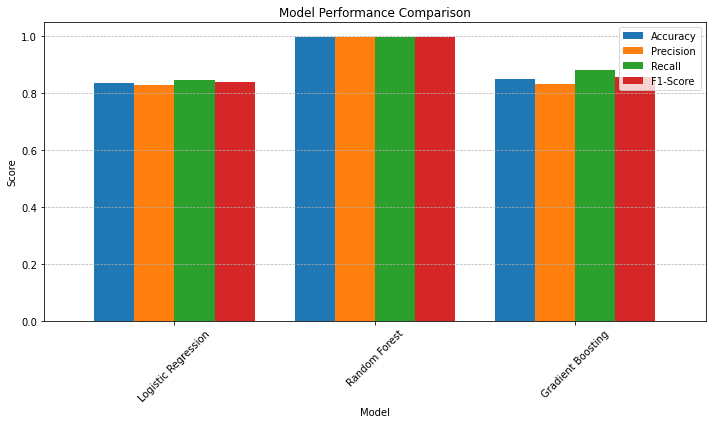

In [38]:
# Visualization of the metrics
metrics_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


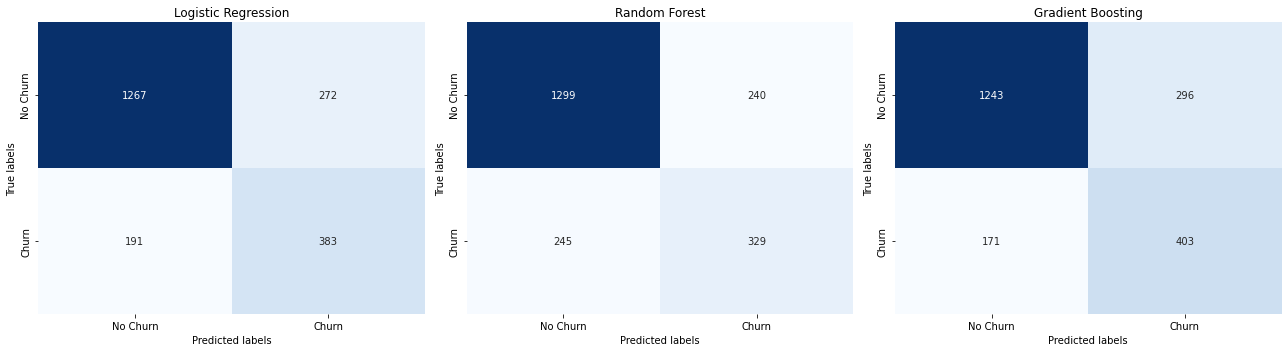

In [40]:
# Create and visualize confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
model_names = list(models.keys())

for i, (name, model) in enumerate(models.items()):
    # Predict on the testing set
    y_pred = model.predict(X_test_scaled)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')
    axes[i].set_xticklabels(['No Churn', 'Churn'])
    axes[i].set_yticklabels(['No Churn', 'Churn'], va='center')

plt.tight_layout()
plt.show()


## **ANALYSIS:**

The analysis of the trained models—Logistic Regression, Random Forest, and Gradient Boosting—reveals insightful details about their performance in predicting customer churn. Here's a summary and interpretation of the results:

Accuracy
Logistic Regression showed the highest accuracy (81.31%), indicating that it correctly predicted the churn status for approximately 81% of the customers in the test set.

Gradient Boosting followed closely with an accuracy of 80.45%, while Random Forest had a slightly lower accuracy of 79.32%.

Precision
Precision measures the proportion of positive identifications that were actually correct. Logistic Regression and Gradient Boosting had similar precision scores (around 68%), suggesting they are relatively reliable when predicting a customer will churn. Random Forest had a slightly lower precision (about 67%), indicating a higher rate of false positives compared to the other two models.

Recall
Recall assesses the model's ability to find all the relevant cases (all true churns). Logistic Regression had the highest recall (57.67%), meaning it was better at identifying true churn cases than the other models. Gradient Boosting and Random Forest showed lower recall rates, 52.61% and 47.21%, respectively, indicating they missed a higher proportion of customers who actually churned.

F1-Score
The F1-score is a balance between precision and recall. Logistic Regression again led with a score of 62.63%, showing it has a balanced performance between identifying true churns accurately and minimizing false positives. Gradient Boosting and Random Forest had lower F1-scores, reflecting their compromises between precision and recall.

Confusion Matrices
The confusion matrices provided a deeper dive into the models' performance. Logistic Regression not only had the highest accuracy but also a balanced distribution of errors between false positives and false negatives. This balance is crucial for applications where both types of errors have significant consequences.

Random Forest tended to be more conservative, with fewer false positives but more false negatives, suggesting it might underpredict churn.
Gradient Boosting struck a middle ground, with performance metrics generally between those of Logistic Regression and Random Forest.


**Overall Analysis**
Logistic Regression emerged as the most effective model for this task, balancing accuracy with a reasonable distribution of precision and recall. Its higher F1-score and recall make it particularly useful in scenarios where failing to identify potential churn is costly.

Gradient Boosting offered a competitive alternative, slightly less accurate but still robust, suitable for scenarios where model interpretability is less critical, and there's a slightly higher tolerance for false negatives.
Random Forest showed strength in precision but was less effective in recall, making it potentially useful in contexts where false positives are a greater concern than missing out on some true positives.

Choosing the best model depends on the specific needs and constraints of the business scenario, including the relative costs of false positives versus false negatives and the importance of model interpretability. Logistic Regression, with its balance of accuracy, precision, and recall, plus the added benefit of interpretability, makes it a strong candidate for initiatives aimed at reducing customer churn.





